In [ ]:
from sklearn.svm import SVR
from sklearn import svm
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
import numpy as np
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error

In [2]:
data = read_csv('data output.csv',header=0)
datax=[]
datay=[]
date=[]
for i in range(0,data.shape[0]):
    x = data.iloc[i].values[[15]+[14]]
    y = data.iloc[i].values[1]
    z = data.iloc[i].values[0]
    datax.append(x)
    datay.append(y)
    date.append(z)

In [3]:
x_train = datax[0:data.shape[0]-135]
y_train = datay[0:data.shape[0]-135]
x_test = datax[data.shape[0]-135:data.shape[0]]
y_test = datay[data.shape[0]-135:data.shape[0]]
y_date = date[data.shape[0]-135:data.shape[0]]

In [4]:
parameters = {'kernel': ('linear', 'rbf'), 'C':[1.5, 10],'gamma': [0.001,0.01],'epsilon':[0.1,0.2,0.5,0.3]}

svr = svm.SVR()
clf = GridSearchCV(svr, parameters,cv=2)
clf.fit(x_train,y_train)
clf.best_params_

{'C': 1.5, 'epsilon': 0.3, 'gamma': 0.001, 'kernel': 'linear'}

In [15]:
model = SVR(kernel='linear', epsilon=0.3, C = 1.5,\
    gamma = 0.001)
model.fit(x_train,y_train)

SVR(C=1.5, cache_size=200, coef0=0.0, degree=3, epsilon=0.3, gamma=0.001,
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [10]:
y_pred=[]
y_pred=model.predict(x_test)

In [11]:
y_true=y_test
add=0
print(y_test)
for i in range(len(y_true)):
    add=(np.abs((((y_true[i] - y_pred[i]) / y_true)) * 100))
MAPE=np.mean(add)
print(add)
print(MAPE)

[6372.9, 6372.74, 6356.2, 6406.87, 6441.52, 6504.78, 6487.86, 6414.51, 6404.48, 6399.58, 6394.43, 6367.66, 6001.31, 5629.34, 5594.21, 5557.76, 5599.16, 5238.99, 4634.88, 4521.85, 4493.2, 4324.98, 4109.18, 3899.17, 3886.32, 3777.66, 4072.06, 4276.66, 4143.04, 4129.56, 4188.28, 4009.47, 3937.89, 3859.1, 3667.81, 3431.34, 3438.68, 3560.46, 3558.04, 3456.89, 3464.03, 3397.36, 3272.58, 3236.86, 3257.17, 3412.5, 3607.34, 3772.33, 3949.21, 4019.9, 3945.54, 4020.52, 4087.76, 3936.52, 3835.05, 3757.35, 3793.96, 3884.27, 3846.86, 3801.04, 3787.09, 3889.5, 3882.42, 3834.88, 3859.74, 3958.24, 4054.34, 4041.32, 4039.48, 3859.14, 3682.08, 3675.26, 3607.88, 3635.87, 3668.75, 3649.24, 3658.13, 3663.86, 3697.96, 3663.22, 3585.94, 3585.03, 3594.76, 3592.64, 3598.92, 3612.62, 3592.14, 3520.18, 3448.47, 3463.66, 3473.98, 3470.51, 3499.14, 3487.36, 3461.29, 3462.85, 3437.63, 3409.14, 3538.7, 3667.32, 3674.85, 3670.48, 3645.86, 3643.17, 3625.5, 3623.55, 3628.29, 3651.73, 3798.43, 3944.44, 3968.31, 3976.12, 

In [13]:
print('\nMean Absolute Percentage Error')
print('MAPE Linear Regression', MAPE)
 
 
print ('\nMean Absolute Error')
print ('MAE Linear Regression', mean_absolute_error(y_true,y_pred))


Mean Absolute Percentage Error
MAPE Linear Regression 0.9307555714826079

Mean Absolute Error
MAE Linear Regression 56.30845661281449


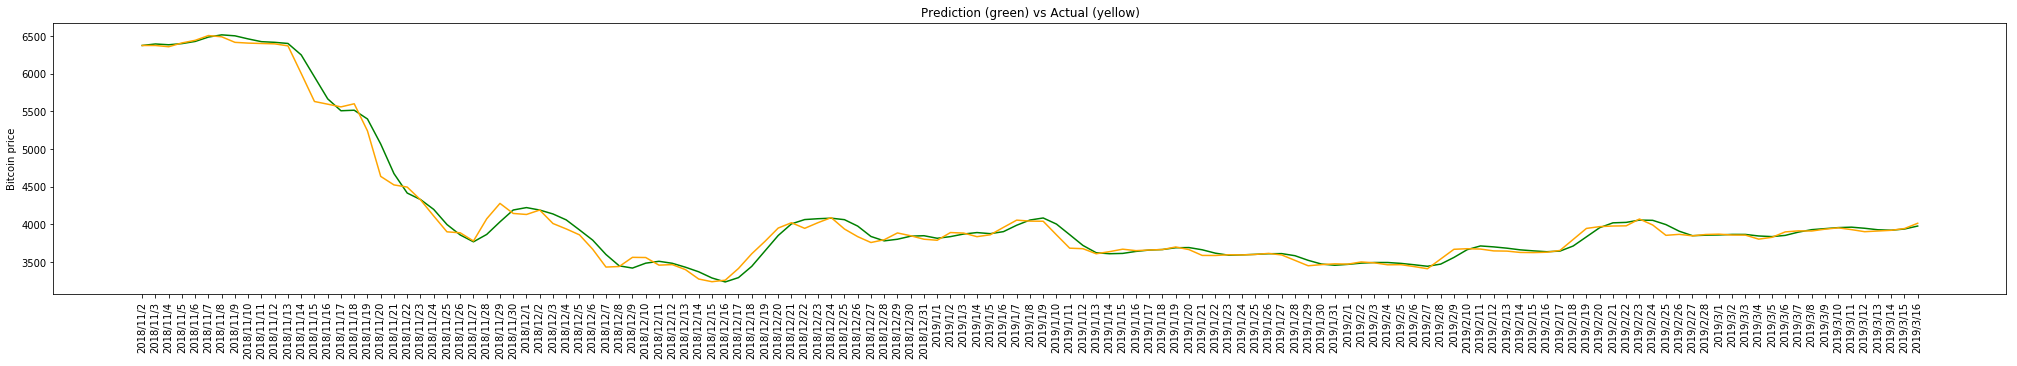

In [14]:
plt.figure(figsize=(35,5))
plt.plot(y_date,y_pred,color='g')
plt.plot(y_true, color='orange')
plt.ylabel('Bitcoin price')
plt.title('Prediction (green) vs Actual (yellow)')
plt.xticks(rotation=90)
plt.show()

In [13]:
data = read_csv('Final.csv',header=0)
datax=[]
datay=[]
date=[]
for i in range(0,data.shape[0]):
    x = data.iloc[i].values[[14]+[15]]
    y = data.iloc[i].values[1]
    z = data.iloc[i].values[0]
    datax.append(x)
    datay.append(y)
    date.append(z)
print(x)


[3930.67 3925.99]


In [14]:
x_train = datax[0:data.shape[0]-125]
y_train = datay[0:data.shape[0]-125]
x_test = datax[data.shape[0]-125:data.shape[0]]
y_test = datay[data.shape[0]-125:data.shape[0]]
y_date = date[data.shape[0]-125:data.shape[0]]

In [15]:
parameters = {'kernel': ('linear', 'rbf'), 'C':[1, 10,100,1000],'gamma': [0.001,0.1,0.0001],'epsilon':[0.1,0.2,0.5,0.3]}
svr = svm.SVR()
clf = GridSearchCV(svr, parameters,cv=2)
clf.fit(x_train,y_train)
clf.best_params_

{'C': 10, 'epsilon': 0.5, 'gamma': 0.001, 'kernel': 'linear'}

In [16]:
model = SVR(kernel='linear', epsilon=0.5, C = 10,\
    gamma = 0.001)
model.fit(x_train,y_train)
y_pred=[]
y_pred=model.predict(x_test)

In [17]:
y_true=y_test
add=0
print(y_test)
for i in range(len(y_true)):
    add=(np.abs((((y_true[i] - y_pred[i]) / y_true)) * 100))
MAPE=np.mean(add)
print(add)
print(MAPE)

[6371.27, 6359.49, 5738.35, 5648.03, 5575.55, 5554.33, 5623.54, 4871.49, 4451.87, 4602.17, 4365.94, 4347.11, 3880.76, 4009.97, 3779.13, 3820.72, 4257.42, 4278.85, 4017.27, 4214.67, 4139.88, 3894.13, 3956.89, 3753.99, 3521.1, 3419.94, 3476.11, 3614.23, 3502.66, 3424.59, 3486.95, 3313.68, 3242.48, 3236.76, 3252.84, 3545.86, 3696.06, 3745.95, 4134.44, 3896.54, 4014.18, 3998.98, 4078.6, 3815.49, 3857.3, 3654.83, 3923.92, 3820.41, 3865.95, 3742.7, 3843.52, 3943.41, 3836.74, 3857.72, 3845.19, 4076.63, 4025.25, 4030.85, 4035.3, 3678.92, 3687.37, 3661.3, 3552.95, 3706.05, 3630.68, 3655.01, 3678.56, 3657.84, 3728.57, 3601.01, 3576.03, 3604.58, 3585.12, 3600.87, 3599.77, 3602.46, 3583.97, 3470.45, 3448.12, 3486.18, 3457.79, 3487.95, 3521.06, 3464.01, 3459.15, 3466.36, 3413.77, 3399.47, 3666.78, 3671.2, 3690.19, 3648.43, 3653.53, 3632.07, 3616.88, 3620.81, 3629.79, 3673.84, 3915.71, 3947.09, 3999.82, 3954.12, 4005.53, 4142.53, 3810.43, 3882.7, 3854.36, 3851.05, 3854.79, 3859.58, 3864.42, 3847.18,

In [18]:
print('\nMean Absolute Percentage Error')
print('MAPE Linear Regression', MAPE)
 
 
print ('\nMean Absolute Error')
print ('MAE Linear Regression', mean_absolute_error(y_true,y_pred))

sqrt(mean_squared_error(y_true, y_pred))


Mean Absolute Percentage Error
MAPE Linear Regression 3.667756063058339

Mean Absolute Error
MAE Linear Regression 119.2513701857804


183.89155587144242

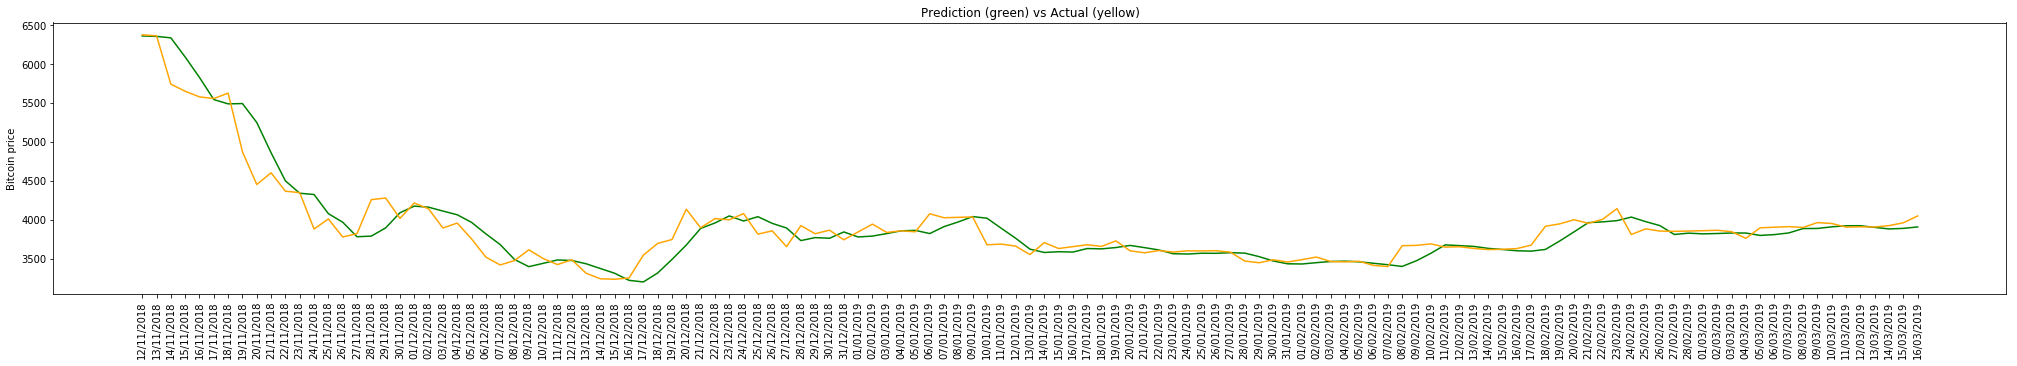

In [19]:
plt.figure(figsize=(35,5))
plt.plot(y_date,y_pred,color='g')
plt.plot(y_true, color='orange')
plt.ylabel('Bitcoin price')
plt.title('Prediction (green) vs Actual (yellow)')
plt.xticks(rotation=90)
plt.show()

In [27]:
data = read_csv('Final.csv',header=0)
datax=[]
datay=[]
date=[]
for i in range(0,data.shape[0]):
    x = data.iloc[i].values[[14]]
    y = data.iloc[i].values[1]
    z = data.iloc[i].values[0]
    #x=preprocessing.scale(x)
    datax.append(x)
    datay.append(y)
    date.append(z)
    a=np.array(datax)
    a.reshape(-1,1)
print(a)

[[256.38]
 [259.58]
 [259.03]
 ...
 [3907.04]
 [3913.42]
 [3930.67]]


In [28]:
x_train = a[0:data.shape[0]-125]
y_train = datay[0:data.shape[0]-125]
x_test = a[data.shape[0]-125:data.shape[0]]
y_test = datay[data.shape[0]-125:data.shape[0]]
y_date = date[data.shape[0]-125:data.shape[0]]

In [ ]:
parameters = {'kernel': ('linear', 'rbf'), 'C':[1, 10,100,1000],'gamma': [0.001,0.1,0.0001],'epsilon':[0.1,0.2,0.5,0.3]}
svr = svm.SVR()
clf = GridSearchCV(svr, parameters,cv=2)
clf.fit(x_train,y_train)
clf.best_params_

In [25]:
// number =135
parameters = {'kernel': ('linear', 'rbf'), 'C':[1, 10,100,1000],'gamma': [0.001,0.1,0.0001],'epsilon':[0.1,0.2,0.5,0.3]}
svr = svm.SVR()
clf = GridSearchCV(svr, parameters,cv=2)
clf.fit(x_train,y_train)
clf.best_params_

{'C': 10, 'epsilon': 0.2, 'gamma': 0.001, 'kernel': 'linear'}

In [29]:
model = SVR(kernel='linear', epsilon=0.2, C = 10,\
    gamma = 0.001)
model.fit(x_train,y_train)
y_pred=[]
y_pred=model.predict(x_test)

In [30]:
y_true=y_test
add=0
print(y_test)
for i in range(len(y_true)):
    add=(np.abs((((y_true[i] - y_pred[i]) / y_true)) * 100))
MAPE=np.mean(add)
print(add)
print(MAPE)

[6371.27, 6359.49, 5738.35, 5648.03, 5575.55, 5554.33, 5623.54, 4871.49, 4451.87, 4602.17, 4365.94, 4347.11, 3880.76, 4009.97, 3779.13, 3820.72, 4257.42, 4278.85, 4017.27, 4214.67, 4139.88, 3894.13, 3956.89, 3753.99, 3521.1, 3419.94, 3476.11, 3614.23, 3502.66, 3424.59, 3486.95, 3313.68, 3242.48, 3236.76, 3252.84, 3545.86, 3696.06, 3745.95, 4134.44, 3896.54, 4014.18, 3998.98, 4078.6, 3815.49, 3857.3, 3654.83, 3923.92, 3820.41, 3865.95, 3742.7, 3843.52, 3943.41, 3836.74, 3857.72, 3845.19, 4076.63, 4025.25, 4030.85, 4035.3, 3678.92, 3687.37, 3661.3, 3552.95, 3706.05, 3630.68, 3655.01, 3678.56, 3657.84, 3728.57, 3601.01, 3576.03, 3604.58, 3585.12, 3600.87, 3599.77, 3602.46, 3583.97, 3470.45, 3448.12, 3486.18, 3457.79, 3487.95, 3521.06, 3464.01, 3459.15, 3466.36, 3413.77, 3399.47, 3666.78, 3671.2, 3690.19, 3648.43, 3653.53, 3632.07, 3616.88, 3620.81, 3629.79, 3673.84, 3915.71, 3947.09, 3999.82, 3954.12, 4005.53, 4142.53, 3810.43, 3882.7, 3854.36, 3851.05, 3854.79, 3859.58, 3864.42, 3847.18,

In [28]:
print('\nMean Absolute Percentage Error')
print('MAPE Linear Regression', MAPE)
 
 
print ('\nMean Absolute Error')
print ('MAE Linear Regression', mean_absolute_error(y_true,y_pred))

print ('\nRoot Mean Squared Error')
print ('RMSE Linear Regression', sqrt(mean_squared_error(y_true, y_pred)))


Mean Absolute Percentage Error
MAPE Linear Regression 2.2730453620449236

Mean Absolute Error
MAE Linear Regression 129.24390354070644


201.50062047347188

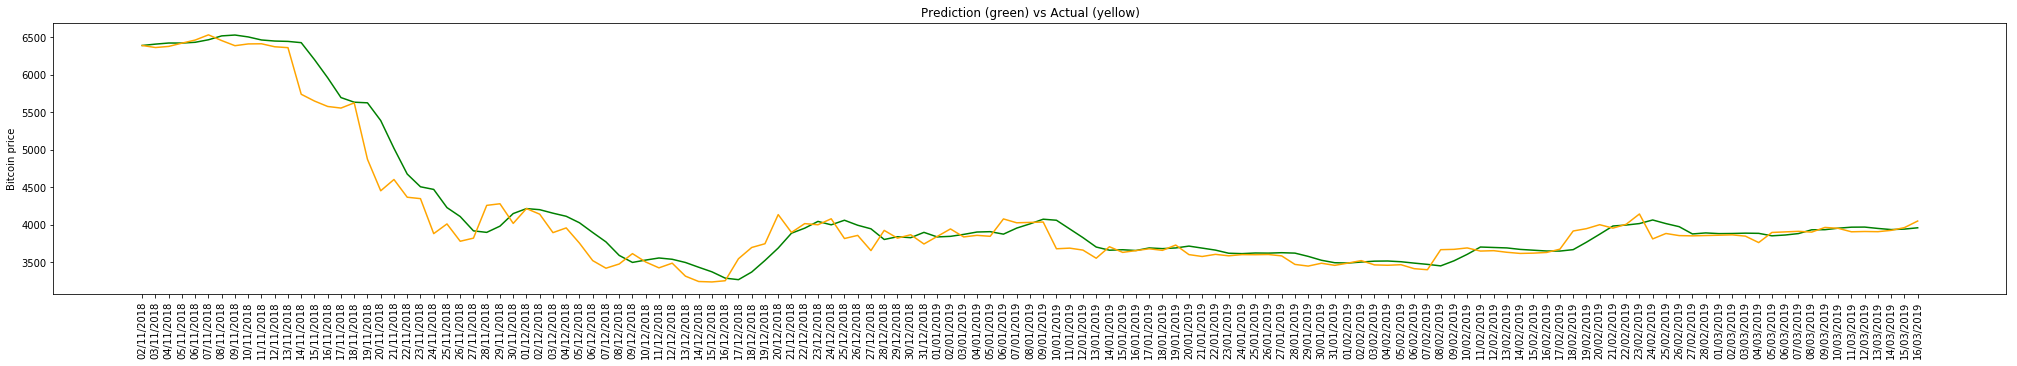

In [29]:
plt.figure(figsize=(35,5))
plt.plot(y_date,y_pred,color='g')
plt.plot(y_true, color='orange')
plt.ylabel('Bitcoin price')
plt.title('Prediction (green) vs Actual (yellow)')
plt.xticks(rotation=90)
plt.show()

In [20]:
data = read_csv('Final.csv',header=0)
datax=[]
datay=[]
date=[]
for i in range(0,data.shape[0]):
    x = data.iloc[i].values[[14]+[15]+[16]+[8]]
    y = data.iloc[i].values[1]
    z = data.iloc[i].values[0]
    datax.append(x)
    datay.append(y)
    date.append(z)
print(x)

[3930.67 3925.99 3900.53 60.48]


In [21]:
x_train = datax[0:data.shape[0]-125]
y_train = datay[0:data.shape[0]-125]
x_test = datax[data.shape[0]-125:data.shape[0]]
y_test = datay[data.shape[0]-125:data.shape[0]]
y_date = date[data.shape[0]-125:data.shape[0]]

In [22]:
parameters = {'kernel': ('linear', 'rbf'), 'C':[1, 10,100,1000],'gamma': [0.001,0.1,0.0001],'epsilon':[0.1,0.2,0.5,0.3]}
svr = svm.SVR()
clf = GridSearchCV(svr, parameters,cv=2)
clf.fit(x_train,y_train)
clf.best_params_

{'C': 10, 'epsilon': 0.2, 'gamma': 0.001, 'kernel': 'linear'}

In [23]:
model = SVR(kernel='linear', epsilon=0.2, C = 10,\
    gamma = 0.001)
model.fit(x_train,y_train)
y_pred=[]
y_pred=model.predict(x_test)

In [24]:
y_true=y_test
add=0
print(y_test)
for i in range(len(y_true)):
    add=(np.abs((((y_true[i] - y_pred[i]) / y_true)) * 100))
MAPE=np.mean(add)
print(add)
print(MAPE)

[6371.27, 6359.49, 5738.35, 5648.03, 5575.55, 5554.33, 5623.54, 4871.49, 4451.87, 4602.17, 4365.94, 4347.11, 3880.76, 4009.97, 3779.13, 3820.72, 4257.42, 4278.85, 4017.27, 4214.67, 4139.88, 3894.13, 3956.89, 3753.99, 3521.1, 3419.94, 3476.11, 3614.23, 3502.66, 3424.59, 3486.95, 3313.68, 3242.48, 3236.76, 3252.84, 3545.86, 3696.06, 3745.95, 4134.44, 3896.54, 4014.18, 3998.98, 4078.6, 3815.49, 3857.3, 3654.83, 3923.92, 3820.41, 3865.95, 3742.7, 3843.52, 3943.41, 3836.74, 3857.72, 3845.19, 4076.63, 4025.25, 4030.85, 4035.3, 3678.92, 3687.37, 3661.3, 3552.95, 3706.05, 3630.68, 3655.01, 3678.56, 3657.84, 3728.57, 3601.01, 3576.03, 3604.58, 3585.12, 3600.87, 3599.77, 3602.46, 3583.97, 3470.45, 3448.12, 3486.18, 3457.79, 3487.95, 3521.06, 3464.01, 3459.15, 3466.36, 3413.77, 3399.47, 3666.78, 3671.2, 3690.19, 3648.43, 3653.53, 3632.07, 3616.88, 3620.81, 3629.79, 3673.84, 3915.71, 3947.09, 3999.82, 3954.12, 4005.53, 4142.53, 3810.43, 3882.7, 3854.36, 3851.05, 3854.79, 3859.58, 3864.42, 3847.18,

In [25]:
print('\nMean Absolute Percentage Error')
print('MAPE Linear Regression', MAPE)
 
 
print ('\nMean Absolute Error')
print ('MAE Linear Regression', mean_absolute_error(y_true,y_pred))

print ('\nRoot Mean Squared Error')
print ('RMSE Linear Regression', sqrt(mean_squared_error(y_true, y_pred)))


Mean Absolute Percentage Error
MAPE Linear Regression 0.9411144584541755

Mean Absolute Error
MAE Linear Regression 195.72238753995893

Root Mean Squared Error
RMSE Linear Regression 264.1821434674845


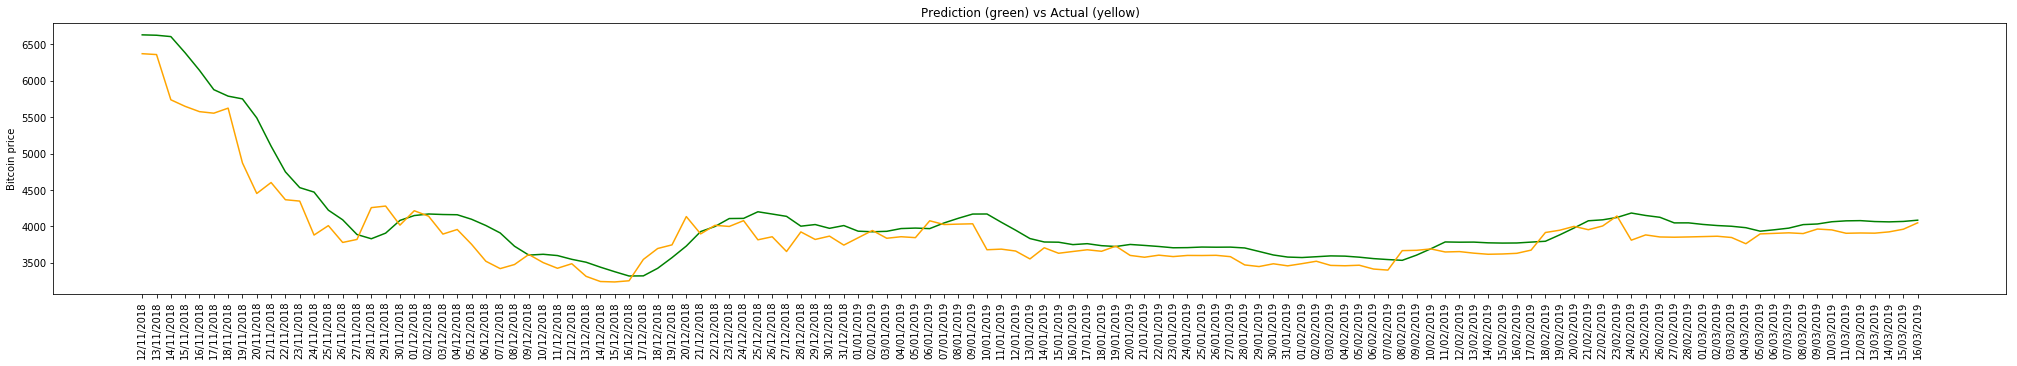

In [26]:
plt.figure(figsize=(35,5))
plt.plot(y_date,y_pred,color='g')
plt.plot(y_true, color='orange')
plt.ylabel('Bitcoin price')
plt.title('Prediction (green) vs Actual (yellow)')
plt.xticks(rotation=90)
plt.show()